In [79]:
import os
import sys
import pandas as pd
from pathlib import Path
import math

In [80]:
#from io import StringIO
#import csv
#from utils import read_data, make_output_directories
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import json

## Comparison demo-cartpole-[DQN|Rainbow]

In [223]:
# Comparison between...

worlds = [
    {'code': ('cartpole','dqn','demo')},
    {'code': ('cartpole','rainbow','demo')},
    {'code': ('cartpole','dqn','')},
    {'code': ('cartpole','rainbow','')}
]

#### Path

In [224]:
# FUNCTION for Path
def path_from_details(env: str, alg: str, demo: str = '') -> str:
    return os.path.join(
        Path(os.path.abspath("")).parent,
        "output",
        demo, # ''|'demo'
        alg,  # 'rainbow'|'dqn'
        env,  # 'cartpole'|'kdd99'
        "latest"
    )

In [225]:
# Get paths
for world in worlds:
    world['path'] = path_from_details(*world['code'])
worlds

[{'code': ('cartpole', 'dqn', 'demo'),
  'path': '/home/maklins/Programation/AI/Cybersecurity/cyberai/output/demo/dqn/cartpole/latest'},
 {'code': ('cartpole', 'rainbow', 'demo'),
  'path': '/home/maklins/Programation/AI/Cybersecurity/cyberai/output/demo/rainbow/cartpole/latest'},
 {'code': ('cartpole', 'dqn', ''),
  'path': '/home/maklins/Programation/AI/Cybersecurity/cyberai/output/dqn/cartpole/latest'},
 {'code': ('cartpole', 'rainbow', ''),
  'path': '/home/maklins/Programation/AI/Cybersecurity/cyberai/output/rainbow/cartpole/latest'}]

#### Load Scores & Losses

In [226]:
# Function to Read Data
concat = lambda x,y: os.path.join(x,f'{y}.csv')
def load_scores_losses(world):
    world['losses'] = pd.read_csv(concat(world['path'],'losses'), names=['loss'])
    world['scores'] = pd.read_csv(concat(world['path'],'scores'), names=['score'])
def read_metadata(world):
    with open(os.path.join(world['path'],'metadata.json'), 'r') as f:
        world['metadata'] = json.load(f)

In [227]:
for world in worlds:    
    load_scores_losses(world)
    read_metadata(world)

#### Plotting Scores

24
cartpole-dqn-demo
cartpole-rainbow-demo
cartpole-dqn-
cartpole-rainbow-


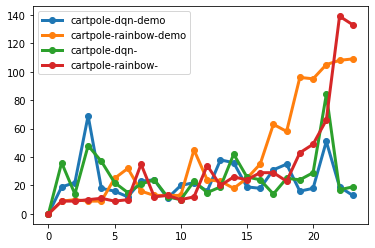

In [230]:
min_ = float('inf')
for world in worlds:
    if len(world['scores']['score'])<min_:
        min_ = len(world['scores']['score'])
print(min_)

# Data
df=pd.DataFrame()
df['x'] = range(min_)
for world in worlds:
    col = "-".join(world['code'])
    print(col)
    df[col] = world['scores'].iloc[0:min_,:]['score']

# multiple line plot
for world in worlds:
        plt.plot(
            'x',
            "-".join(world['code']),
            data=df,
            marker='o',
            #markerfacecolor='blue',
            markersize=6,
            #color='skyblue',
            linewidth=3
        )
plt.legend()